In this study, we will perform an exploratory data analysis of the adult income dataset available on Kaggle and try to find interesting insights from the data without developing a machine learning model.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data into a pandas dataframe
df = pd.read_csv('adult.csv')

In [3]:
# Take a sneak peak into the data
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Typecheck
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Seems like all the missing values are represented by '?' sign. We need to replace it with NaN.

In [5]:
df = df.replace('?', np.nan)

In [6]:
# Let's count the number of missing values in each columns
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Workclass and occupation were collected from the same source and as a result both are missing concurrently. Also, there is a significant of amount of missing values in native country column.

In [7]:
# Descriptive analysis of each columns
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Create a binary column to indicate wheather a person earns more than 50K or not
df['50K_threshold'] = df.apply(lambda x: 1 if x['income'] == '>50K' else 0, axis=1)

Text(0, 0.5, 'Count')

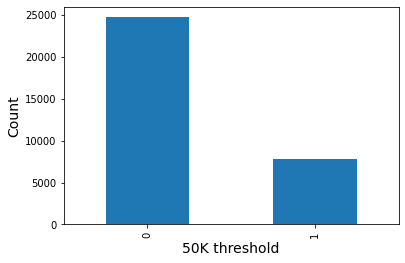

In [9]:
# Plot the count of people meeting the 50K income threshold criteria or not
df['50K_threshold'].value_counts().plot(kind='bar')
plt.xlabel('50K threshold', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

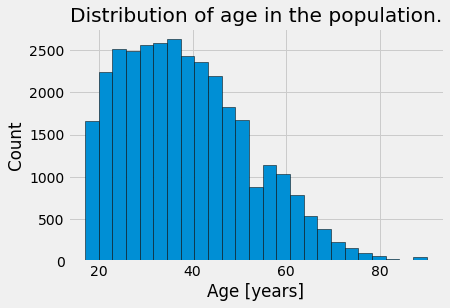

In [10]:
# Plot the income based on age bracket
plt.style.use('fivethirtyeight')

plt.hist(df['age'], edgecolor = 'k', bins = 25)
plt.title('Distribution of age in the population.') 
plt.xlabel('Age [years]')
plt.ylabel('Count')

The age distribution is perfect for good economic growth as most of the population are young (20-45) yrs.

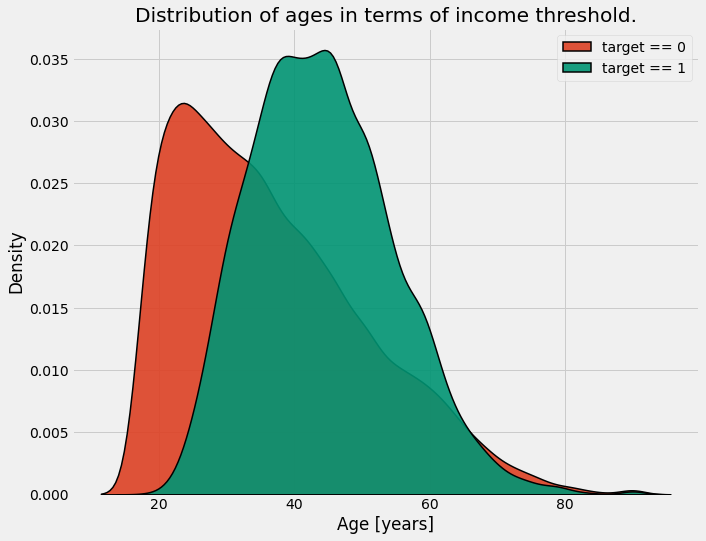

In [11]:
# colours
low_c = '#dd4124'
high_c = '#009473'

plt.figure(figsize = (10, 8))

sns.kdeplot(df.loc[df['50K_threshold'] == 0, 'age'], label = 'target == 0', color=low_c, ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3)
sns.kdeplot(df.loc[df['50K_threshold'] == 1, 'age'], label = 'target == 1', color=high_c, ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3)

plt.xlabel('Age [years]')
plt.ylabel('Density')
plt.title('Distribution of ages in terms of income threshold.')
plt.legend()

As expected, people in their late 30's and 40's has the highest percentage of high earners, while young population who are just entering the workforce are low earners.

In [12]:
df_age_binned = df[['age', '50K_threshold']]
df_age_binned['age_binned'] = pd.cut(df_age_binned['age'], bins = np.linspace(15, 90, num = 16))
df_age_binned.head(10)

<ipython-input-12-280eae5b0cfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_binned['age_binned'] = pd.cut(df_age_binned['age'], bins = np.linspace(15, 90, num = 16))


,age,50K_threshold,age_binned
0,90,0,"(85.0, 90.0]"
1,82,0,"(80.0, 85.0]"
2,66,0,"(65.0, 70.0]"
3,54,0,"(50.0, 55.0]"
4,41,0,"(40.0, 45.0]"
5,34,0,"(30.0, 35.0]"
6,38,0,"(35.0, 40.0]"
7,74,1,"(70.0, 75.0]"
8,68,0,"(65.0, 70.0]"
9,41,1,"(40.0, 45.0]"


Text(0, 0.5, 'Income above 50K in percentage')

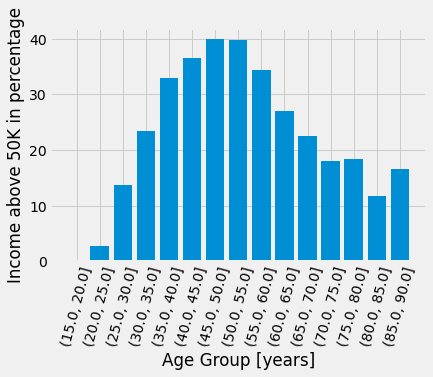

In [13]:
age_groups  = df_age_binned.groupby('age_binned').mean()
plt.bar(age_groups.index.astype(str), 100 * age_groups['50K_threshold'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group [years]')
plt.ylabel('Income above 50K in percentage')

It further reonforces our finding in the previous section that people withing 35-55 age range has the highest percentage of 50K+ earnings.

Text(0, 0.5, 'Income above 50K in percentage')

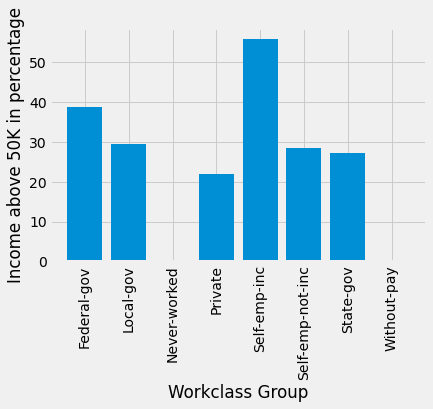

In [14]:
workclass_groups  = df.groupby('workclass').mean()
plt.bar(workclass_groups.index.astype(str), 100 * workclass_groups['50K_threshold'])
plt.xticks(rotation = 90)
plt.xlabel('Workclass Group')
plt.ylabel('Income above 50K in percentage')

People who never worked or without pay has no earning and hence there percentage is 0 for 50K+ earning. Of the other working class, self-employed has the highest percentage of 50K+ earners. Next, federal gov. employees are also mostly high earners (~40%). Surprisingly, contrary to popular belief private sector has only about 25% high earners. Most likely reason is the income inequality is higher is private sector as the people in the higher up in the hierarchy is usually paid disporportionately higher.

<AxesSubplot:xlabel='50K_threshold', ylabel='fnlwgt'>

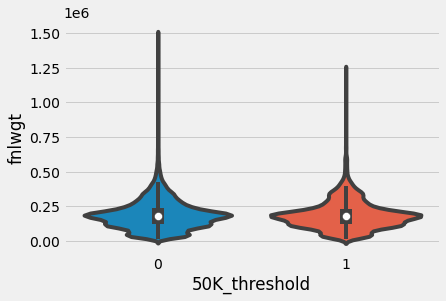

In [18]:
sns.violinplot(data=df, x='50K_threshold', y='fnlwgt')

There is no significant difference between high-earners and low-earners, except low earners tend to have more outlier in the high fnlwgt region.

/Users/mamu867/.virtualenvs/pycaret/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

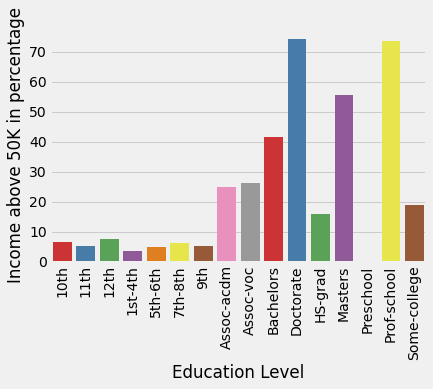

In [22]:
education_groups  = df.groupby('education').mean()
sns.barplot(education_groups.index.astype(str), 100 * education_groups['50K_threshold'], palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Education Level')
plt.ylabel('Income above 50K in percentage')

Doctorates and professionals are amongst the highest earners for all education class. Not surprisingly, income is highly correlated with the education level.

/Users/mamu867/.virtualenvs/pycaret/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

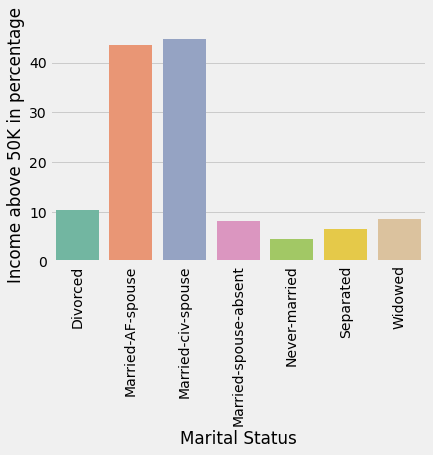

In [25]:
marital_groups  = df.groupby('marital.status').mean()
sns.barplot(marital_groups.index.astype(str), 100 * marital_groups['50K_threshold'], palette='Set2')
plt.xticks(rotation = 90)
plt.xlabel('Marital Status')
plt.ylabel('Income above 50K in percentage')

It also seems like earning is highly correlated with the marital status. Marriage may act as a source of inspiration or motivation which results in higher earning. Or high earners tend to have higher education and in turn they value marriage more. 

/Users/mamu867/.virtualenvs/pycaret/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

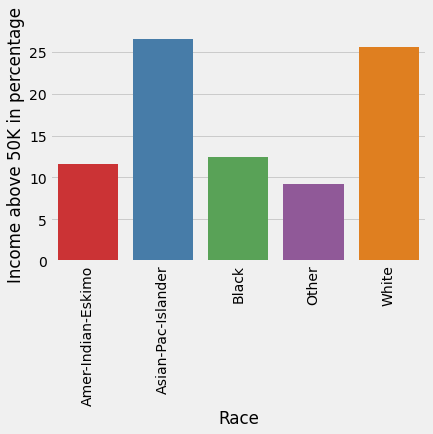

In [26]:
race_groups  = df.groupby('race').mean()
sns.barplot(race_groups.index.astype(str), 100 * race_groups['50K_threshold'], palette='Set1')
plt.xticks(rotation = 90)
plt.xlabel('Race')
plt.ylabel('Income above 50K in percentage')

Whites and Asian Pacific Islanders has the highest percentage of high earners, while Blacks, American Indian Eskimos, and other are the low earners. 

/Users/mamu867/.virtualenvs/pycaret/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Income above 50K in percentage')

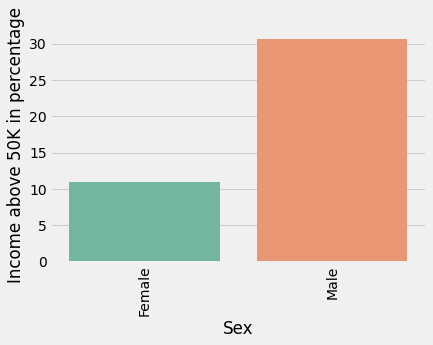

In [27]:
sex_groups  = df.groupby('sex').mean()
sns.barplot(sex_groups.index.astype(str), 100 * sex_groups['50K_threshold'], palette='Set2')
plt.xticks(rotation = 90)
plt.xlabel('Sex')
plt.ylabel('Income above 50K in percentage')

Not surprisingly, man has a higher percentage of high earners than woman. We still have a long way to go to achieve gender parity in terms of financial empowerment.

<AxesSubplot:xlabel='50K_threshold', ylabel='hours.per.week'>

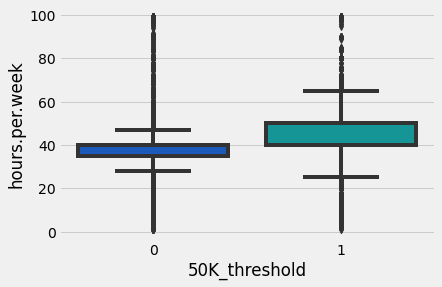

In [30]:
sns.boxplot(data=df, x='50K_threshold', y='hours.per.week', palette='winter')

High earners tend to work longer hours than the low earners. Most of the high earners work around 40-50 hours a week while low earners work about 35-40 hours a week. 